# Using Python and Jupyter to analyze data

This repo should teach you to use Jupyter notebooks as a analysis and visualization framework. 

## Contents

- [Getting Started](#Getting-started)
- [Hello Python](#Hello-Python)
- [Hello Jupyter](#Hello-Jupyter)
- [Hello Data](#Hello-Data)
- [Hello Charts](#Hello-Charts)
- [More Customization](#More-Customization) 
- [Hello Maps!](#Hello-maps!)
- [Useful Links](#Useful-links)


## Getting started

There are a number of ways to [install Jupyter](http://jupyter.readthedocs.io/en/latest/install.html), the most recommended being by using [Anaconda](https://www.continuum.io/downloads). I've never used Anaconda and find it easier to install with [Pip](https://pypi.python.org/pypi/pip) (A package manager for Python, think Python's `npm`,) preferably in a virtual environment. I like to use [Virtualenvwrapper](https://virtualenvwrapper.readthedocs.io/en/latest/).


```bash
$ mkvirtualenv jupyter-skillshare
(jupyter-skillshare) $
```

The parentheses indicate that you're inside your virtualenv. If you need to exit the environment, you can type `deactivate`. To re-enter the virtual environment, type `workon jupyter-skillshare` (or whatever the name of your environment.)


When you have your virtual env ready, clone the repo:

```bash
(jupyter-skillshare) $ git clone git@github.com:emamd/jupyter-skillshare.git jupyter-skillshare
```

Then use pip to install the requirements listed in requirements.txt (this may take a while)

```bash
(jupyter-skillshare) $ pip install -r requirements.txt
```

To boot up a notebook, type `jupyter notebook`

```bash
(jupyter-skillshare) $ jupyter notebook
```

Previously, this would've automatically opened up a browser window, but looks like there's a bug with the latest version of OSX. Open your notebook by going to [localhost:8888](http://localhost:8888)

## Or, a quicker method

[Ben Welsh](https://github.com/palewire) has a notebook server set up for his ["First Python Notebook"](http://www.firstpythonnotebook.org/) MOOC through the California Civic Data Coalition, and has kindly offered it for this skillshare. If you don't feel like going through the setup/install process, you can start up a server at http://notebooks.californiacivicdata.org/ (you'll need to sign in and authorize GitHub to use the server.) 

If you're interested in Python/Jupyter, you should take a look at that course. It's much more in-depth and gives you a much better idea of what's possible with Jupyter notebooks. 

After running `jupyter notebook` and going to localhost:8888 you should see a page that looks similar to this. 

![Jupyter notebook homepage](img/jupyter_homepage.png)


Click the `New` button to create a new Python notebook. 

![Jupyter notebook homepage](img/new_notebook.gif)

You should see something like this, a mostly empty screen with one cell for text:

![Empty notebook](img/empty_notebook.png)

## Hello Python

You can execute any python code in notebooks. The rendered output will appear below your current cell. If you need a starter on Python, [there's a notebook for that](https://notebooks.azure.com/Microsoft/libraries/samples/html/Introduction%20to%20Python.ipynb). 

In [ ]:
print "hello" + " world!"

In [ ]:
2 + 2


In [ ]:
for i in range(0, 5):
    print i
    

Like Python in the interpreter or a script, undefined variables and syntax errors will throw errors. 

In [ ]:
2 + undefined_variable

In [ ]:
for i in range(0,10)
    print i

## Hello Jupyter

You may notice that our code is broken up into little snippets, or "cells." Think of each cell as being broken up into a statement. And because they're reorganizeable (you can cut, paste, and shift cells up and down,) it's good for legibility and your sanity to keep statements short. 

You might also notice that we're mixing "code" cells with Markdown cells. This lets you keep detailed notes and documentation on your work as you go - more detailed than regular inline comments you might use in your code.

Python not your thing? You can install other language kernels to use with the notebook app, including [IRKernel](https://irkernel.github.io/) for R, or [IJavaScript](https://github.com/n-riesco/ijavascript) for JavaScript. You can see the [full list of kernels](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels) available. 

And here are some instructions for [installing and running](https://www.datacamp.com/community/blog/jupyter-notebook-r#gs.6ggEhYw) an R kernel. 

### Some handy shortcuts

`enter` - Enter cell edit mode

`escape` - Enter command mode

`shift-enter` - Run the cell

`a` - Create cell above

`b` - Create cell below

`j` - Move to cell below

`k` - Move to cell above

`m` - Convert cell to Markdown

`y` - Convert cell to code 

`s` - Save notebook

## Hello Data 

Let's read in some data. We'll use data from MLB's [Statcast](https://baseballsavant.mlb.com/statcast_search). `data/nationals_pitch_data.csv` contains every pitch thrown by Washington Nationals pitchers this season. 

We'll read in the CSV as a [Pandas](http://pandas.pydata.org/pandas-docs/stable/) data frame. If you're familiar with data frames in R, you'll find that these work very simliarly. 

First, we need to import Pandas. We'll use a common alias so it's not so clunky to type. Usually this would happen at the top of a notebook but doing it here to illustrate the process.

In [ ]:
import pandas as pd

Note that a little asterisk briefly appears in the brackets next to the cell, and then (hopefully) is replaced by a number. This means the code in the cell is running. 

We can read in the module using `read_csv`. Note that we add `na_values="null"` because that is how NA values are included in the CSV. Otherwise, the cell values would be the string "null". 

In [ ]:
df = pd.read_csv('data/nationals_pitch_data.csv', na_values="null")

### If you're using the server setup, and not the repo

If you're not running this notebook locally, you'll have to download the data from the repo on GitHub. Here's how you do that. 

In [ ]:
import io
import requests

# URL to request
url = "https://raw.githubusercontent.com/emamd/jupyter-skillshare/master/data/nationals_pitch_data.csv"

# Requests fetches the URL and returns the content
csv_content = requests.get(url).content

# Use io.StringIO to create a file-like object that can be used with read_csv()
df = pd.read_csv(io.StringIO(csv_content.decode('utf-8')))

### Summarizing data
There are a number of data summary functions we can use. First, take a quick look at the data using `head`.

In [ ]:
df.head()

You can also see how many rows and columns are in the data with `.shape`. We have data on more than 11,000 pitches, and 78 columns.  

In [ ]:
df.shape

Another important command is `dtypes`, which provides the type of value in a column. "Object" is basically a string. 

In [ ]:
df.dtypes

You can also do this for an individual column.

In [ ]:
df["game_date"].dtype

You can also use `describe` to get an overview of data in a column. I find this easiest to read when summarising one or two columns at a time. This provides summary info like min/max, mean, count, standard deviation and percentile break points.

In [ ]:
df['release_speed'].describe()

For a column with string values, this will give the number of unique values, as well as the most frequent value in the list. It looks like Tanner Roark has thrown the most pitches this season. 

In [ ]:
df['player_name'].describe()

### Grouping and filtering

Let's group these by pitcher. We can group using one or more columns, or a function, but in this case let's just use the "player_name" column.

In [ ]:
by_pitcher = df.groupby(['player_name'])

Now you can see how many items are in each column, kind of like a pivot table. It's important though to remember that each of these contain a reference to that subset of the table. `.size()` gives us a "series" (basically a list of values) with counts of how many times the the pitchers appear in the table. 

In [ ]:
by_pitcher.size()

It's easier to read if we sort it. 

In [ ]:
by_pitcher.size().sort_values(ascending=False)

Let's make this a little more complex - who's thrown the most strikeouts? First let's use `unique` to see all the different type of "events" there are. 

In [ ]:
df['events'].unique()

We can then filter for just strikeouts and do the same groupby query. 

In [ ]:
by_strikeouts = df[df['events'] == 'strikeout'].groupby('player_name')

Looks like Max Scherzer has the most strikeouts, with 144 - not surprising!

In [ ]:
by_strikeouts.size().sort_values(ascending=False)

Let's filter down to just Max Scherzer's pitch data. First, let's subset it from the main dataset. We can do this one of two ways. 

The first, by grabbing from the pitcher grouping:

In [ ]:
scherzer = by_pitcher.get_group('Max Scherzer')

Or we could filter from the main data frame using `.query()`:

In [ ]:
scherzer = df.query('player_name == "Max Scherzer"')

Or you could use a boolean filter like this:

In [ ]:
scherzer = df[df['player_name'] == 'Max Scherzer']

In [331]:
scherzer.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
448,SL,2017-06-21,85.6,-3.5474,5.0513,Max Scherzer,519317,453286,single,hit_into_play_score,...,54.6938,0.836,0.864,0.9,1.0,1.0,0.0,5.0,57,6
449,CH,2017-06-21,86.0,-3.5535,4.9535,Max Scherzer,519317,453286,NaN,foul,...,54.4714,0.000,0.000,NaN,NaN,NaN,NaN,NaN,57,5
450,FF,2017-06-21,95.0,-3.4496,5.1209,Max Scherzer,519317,453286,NaN,ball,...,54.2523,0.000,0.000,NaN,NaN,NaN,NaN,NaN,57,4
451,SL,2017-06-21,86.8,-3.2084,5.3810,Max Scherzer,519317,453286,NaN,foul,...,54.4901,0.000,0.000,NaN,NaN,NaN,NaN,4.0,57,3
452,FF,2017-06-21,96.0,-3.5136,4.9165,Max Scherzer,519317,453286,NaN,ball,...,54.2919,0.000,0.000,NaN,NaN,NaN,NaN,NaN,57,2


There's more than one way to do it! 

### Working with dates

If you look, our `game_date` column is objects (strings). We can use .to_datetime() to convert this to a datetime object. We'll use `.assign()` to create the new `game_date_dt` column. 

In [345]:
scherzer = scherzer.assign(game_date_dt = pd.to_datetime(scherzer['game_date']))

Like python datetime objects, you can extract different values from the date. Let's pull out the month each game was played. 

In [346]:
scherzer = scherzer.assign(game_month = scherzer['game_date_dt'].dt.month)

In [347]:
scherzer.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,game_date_dt,game_month
448,SL,2017-06-21,85.6,-3.5474,5.0513,Max Scherzer,519317,453286,single,hit_into_play_score,...,0.864,0.9,1.0,1.0,0.0,5.0,57,6,2017-06-21,6
449,CH,2017-06-21,86.0,-3.5535,4.9535,Max Scherzer,519317,453286,NaN,foul,...,0.000,NaN,NaN,NaN,NaN,NaN,57,5,2017-06-21,6
450,FF,2017-06-21,95.0,-3.4496,5.1209,Max Scherzer,519317,453286,NaN,ball,...,0.000,NaN,NaN,NaN,NaN,NaN,57,4,2017-06-21,6
451,SL,2017-06-21,86.8,-3.2084,5.3810,Max Scherzer,519317,453286,NaN,foul,...,0.000,NaN,NaN,NaN,NaN,4.0,57,3,2017-06-21,6
452,FF,2017-06-21,96.0,-3.5136,4.9165,Max Scherzer,519317,453286,NaN,ball,...,0.000,NaN,NaN,NaN,NaN,NaN,57,2,2017-06-21,6


## Hello Charts

Let's try charting some of Scherzer's data. We'll use a Python charting library called Matplotlib and Seaborn, which helps those charts be a little more palatable. 

First, this is a funny-looking bit of code, but necessary for plots to appear inline.

In [348]:
%matplotlib inline

Then import the libraries.

In [349]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

For fun, let's group and chart the type of pitches he throws. 

In [350]:
pitch_types = scherzer.groupby(['pitch_type'])

In [351]:
pitch_types.size()

pitch_type
CH    199
CU    137
FF    766
FT     42
SL    463
dtype: int64

Since `.size()` is a series, we can use `.plot()` to quickly generate plots from the data. We use the keyword argument `kind` to specify what type of chart we want. (There are several [other options](https://pandas.pydata.org/pandas-docs/stable/visualization.html#other-plots) as well) 

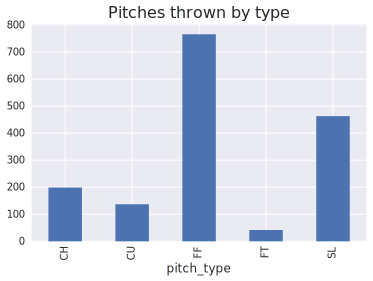

In [352]:
pitch_types.size().plot(kind="bar", title="Pitches thrown by type")

It looks like mostly he relies on a four-seam fastball (FF) and a slider (SL), with some help from a changeup (CH) and a curveball (CU).

How about a histogram of pitch speeds?

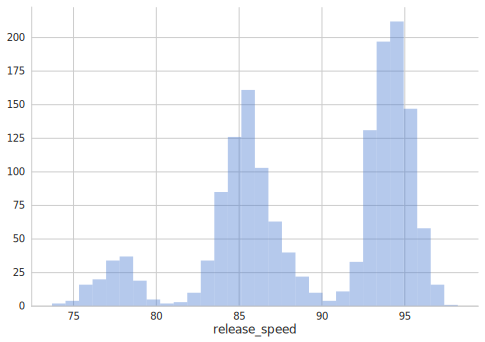

In [379]:
scherzer['release_speed'].plot(kind="hist", 
                               # Number of bins to use
                               bins=30, 
                               # Title of the plot
                               title="Histogram of pitches thrown by speed", 
                               # Size of the plot (x, y)
                               figsize=(8, 5)
                              )

sns.despine()

The color scheme looks good, and by using [Seaborn](https://seaborn.pydata.org/) the charts look better than plain ol' [Matplotlib](https://matplotlib.org/), but we can change the styles to make the charts look a little better. 

In [370]:
sns.set(
    style="whitegrid",
    font="Franklin ITC Std",
    palette="muted",
    color_codes=True,
    
    # Extra parameters sent to matplotlib
    rc={
        # Uses text characters for svg, ie, not embedding or rendering type as a path 
        "svg.fonttype": 'none', 
        # Header font size
        "axes.titlesize": 16,
        # Axis labels font size
        "axes.labelsize": 12
    }
)

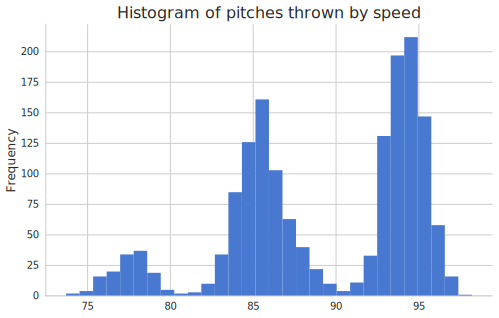

In [380]:
scherzer['release_speed'].plot(kind="hist", 
                               # Number of bins to use
                               bins=30, 
                               # Title of the plot
                               title="Histogram of pitches thrown by speed", 
                               # Size of the plot (x, y)
                               figsize=(8, 5)
                              )

# We can call sns.despine() to remove the border
sns.despine()

This is still kind of a boring chart though. What if we could histogram by speed and type of pitch? 

We can use the "by" argument for that, and get small multiples. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13c3b95d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13c6dad90>]], dtype=object)

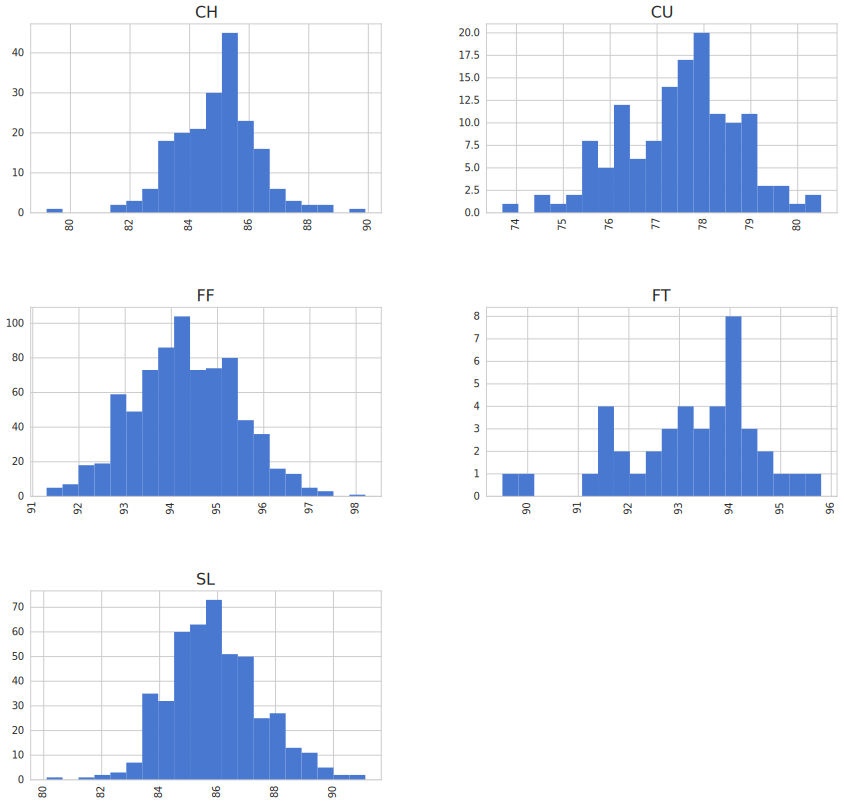

In [381]:
scherzer.hist('release_speed', by='pitch_type', bins=20, figsize=(14, 14))

This isn't great for comparison though, the axes are inconsistent! Instead of using the built-in pandas charting methods, let's use Seaborn's `FacetGrid` method. 

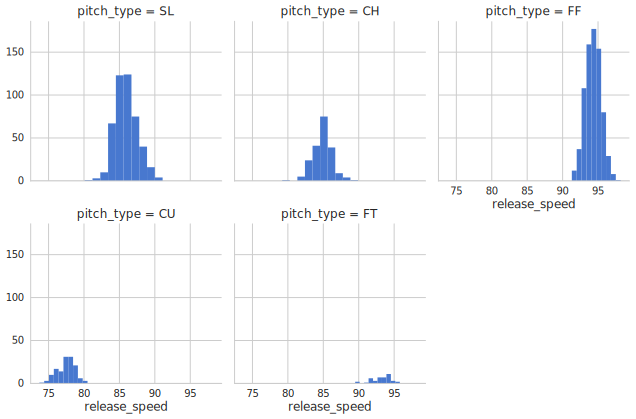

In [391]:
g = sns.FacetGrid(scherzer, col="pitch_type", col_wrap=3)
g = g.map(plt.hist, 'release_speed')

## Exporting your data

### Exporting as a CSV

Exporting as a CSV is easy. Just call `to_csv()` on any data frame.

In [ ]:
scherzer.to_csv('data/scherzer.csv')

### Exporting a chart

Exporting charts is also easy! But requires a bit of config if you want an SVG. 

In [ ]:
%config InlineBackend.figure_format = 'svg'

In [ ]:
# plot a histogram by speed
scherzer['release_speed'].plot(kind="hist", bins=30, title="Histogram of pitches thrown by speed")

# Save to SVG
plt.savefig('svg/scherzer_histogram.svg')

## Hello maps!

Saved for another skillshare!

## Useful links

- [California crop production wages analysis](https://github.com/datadesk/california-crop-production-wages-analysis) good example of how to integrate notebooks into the reporting and analysis process. 
- [Sample notebooks from Microsoft Azure](https://notebooks.azure.com/) includes overviews of using Python, R, etc.
- [28 Jupyter Notebook tips, tricks and shortcuts](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/) 
- [10 Python notebook tutorials for data science and machine learning](http://www.kdnuggets.com/2016/04/top-10-ipython-nb-tutorials.html)
- [More keyboard shortcuts](https://gist.github.com/kidpixo/f4318f8c8143adee5b40) 